In [1]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [4]:
arquivo = pd.read_csv('https://raw.githubusercontent.com/YuriMTSS/Data_Science/main/covid-19/previsoes/covid_19_data.csv')
arquivo.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
arquivo.rename(columns = {'ObservationDate': 'Date', 'Country/Region': 'Country'}, inplace = True)
arquivo.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


#Agrupando por data

In [6]:
mortes = arquivo.groupby('Date').sum()['Deaths'].reset_index()
mortes.head()

,Date,Deaths
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0


# Plotando as mortes

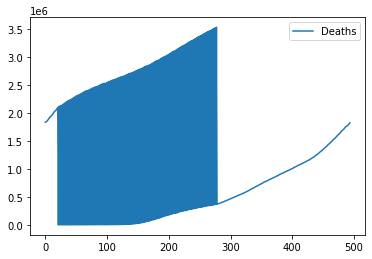

In [7]:
mortes.plot()

# Prophet

In [8]:
mortes.head()

,Date,Deaths
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0


In [9]:
mortes.columns = ['ds', 'y']
mortes.head()

,ds,y
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0


In [10]:
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.head()

,ds,y
0,2021-01-01,1834675.0
1,2021-01-02,1843108.0
2,2021-01-03,1850449.0
3,2021-01-04,1860598.0
4,2021-01-05,1875953.0


# Previsão de mortes por COVID no MUNDO (dias = 30, intervalo = 95%)

In [11]:
dias = 30

In [12]:
mes = Prophet(interval_width=0.95)
mes.fit(mortes)
futuro = mes.make_future_dataframe(periods = dias)

futuro.head(dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [13]:
previsao = mes.predict(futuro)
previsao.head(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-962.141024,-24899.503728,23169.885369,-962.141024,-962.141024,44.186434,44.186434,44.186434,44.186434,44.186434,44.186434,0.0,0.0,0.0,-917.954591
1,2020-01-23,-865.130830,-24361.256137,24920.492081,-865.130830,-865.130830,1100.471275,1100.471275,1100.471275,1100.471275,1100.471275,1100.471275,0.0,0.0,0.0,235.340445
2,2020-01-24,-768.120635,-21887.269201,25282.005282,-768.120635,-768.120635,1974.558942,1974.558942,1974.558942,1974.558942,1974.558942,1974.558942,0.0,0.0,0.0,1206.438307
3,2020-01-25,-671.110441,-22419.574146,27194.790182,-671.110441,-671.110441,1569.875526,1569.875526,1569.875526,1569.875526,1569.875526,1569.875526,0.0,0.0,0.0,898.765085
4,2020-01-26,-574.100247,-24440.818376,24646.853132,-574.100247,-574.100247,-1004.078050,-1004.078050,-1004.078050,-1004.078050,-1004.078050,-1004.078050,0.0,0.0,0.0,-1578.178296
5,2020-01-27,-477.090052,-26045.915665,20778.655179,-477.090052,-477.090052,-2412.532386,-2412.532386,-2412.532386,-2412.532386,-2412.532386,-2412.532386,0.0,0.0,0.0,-2889.622438
6,2020-01-28,-380.079858,-25223.253231,22420.998766,-380.079858,-380.079858,-1272.481741,-1272.481741,-1272.481741,-1272.481741,-1272.481741,-1272.481741,0.0,0.0,0.0,-1652.561599
7,2020-01-29,-283.069663,-25994.063753,25335.275081,-283.069663,-283.069663,44.186434,44.186434,44.186434,44.186434,44.186434,44.186434,0.0,0.0,0.0,-238.883230
8,2020-01-30,-186.059469,-22113.917435,25932.531213,-186.059469,-186.059469,1100.471275,1100.471275,1100.471275,1100.471275,1100.471275,1100.471275,0.0,0.0,0.0,914.411806
9,2020-01-31,-89.049274,-22512.165192,27693.961854,-89.049274,-89.049274,1974.558942,1974.558942,1974.558942,1974.558942,1974.558942,1974.558942,0.0,0.0,0.0,1885.509668


In [14]:
previsao[['ds', 'yhat_lower', 'yhat','yhat_upper']].head()

,ds,yhat_lower,yhat,yhat_upper
0,2020-01-22,-24899.503728,-917.954591,23169.885369
1,2020-01-23,-24361.256137,235.340445,24920.492081
2,2020-01-24,-21887.269201,1206.438307,25282.005282
3,2020-01-25,-22419.574146,898.765085,27194.790182
4,2020-01-26,-24440.818376,-1578.178296,24646.853132


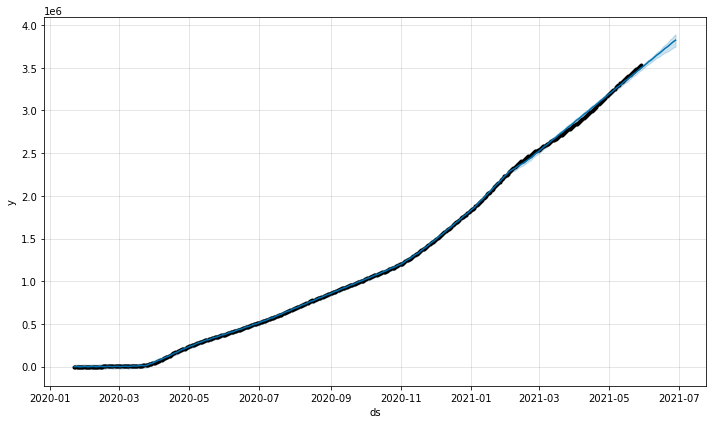

In [15]:
confirmado_forecast_plot = mes.plot(previsao)